# TP2

## Extraction de Keywords

### Imports 

In [25]:
import os
import yake

### Extraire les mots clés d'un document avec Yake

https://github.com/LIAAD/yake

In [26]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général", "bruxelles"])
ignored

{'bruxelles', 'conseil communal', 'conseil général'}

In [27]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [28]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [29]:
# Tous les fichiers de l'année 1959
files[1849:1887]

['Bxl_1959_Tome_II1_Part_1.txt',
 'Bxl_1959_Tome_II1_Part_2.txt',
 'Bxl_1959_Tome_II1_Part_3.txt',
 'Bxl_1959_Tome_II1_Part_4.txt',
 'Bxl_1959_Tome_II1_Part_5.txt',
 'Bxl_1959_Tome_II1_Part_6.txt',
 'Bxl_1959_Tome_II1_Part_7.txt',
 'Bxl_1959_Tome_II1_Part_8.txt',
 'Bxl_1959_Tome_II2_Part_1.txt',
 'Bxl_1959_Tome_II2_Part_10.txt',
 'Bxl_1959_Tome_II2_Part_2.txt',
 'Bxl_1959_Tome_II2_Part_3.txt',
 'Bxl_1959_Tome_II2_Part_4.txt',
 'Bxl_1959_Tome_II2_Part_5.txt',
 'Bxl_1959_Tome_II2_Part_6.txt',
 'Bxl_1959_Tome_II2_Part_7.txt',
 'Bxl_1959_Tome_II2_Part_8.txt',
 'Bxl_1959_Tome_II2_Part_9.txt',
 'Bxl_1959_Tome_I_Part_1.txt',
 'Bxl_1959_Tome_I_Part_10.txt',
 'Bxl_1959_Tome_I_Part_11.txt',
 'Bxl_1959_Tome_I_Part_12.txt',
 'Bxl_1959_Tome_I_Part_2.txt',
 'Bxl_1959_Tome_I_Part_3.txt',
 'Bxl_1959_Tome_I_Part_4.txt',
 'Bxl_1959_Tome_I_Part_5.txt',
 'Bxl_1959_Tome_I_Part_6.txt',
 'Bxl_1959_Tome_I_Part_7.txt',
 'Bxl_1959_Tome_I_Part_8.txt',
 'Bxl_1959_Tome_I_Part_9.txt',
 'Bxl_1959_Tome_RptAn_Part_1.t

In [30]:
# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

2677

In [31]:
# Choisir un fichier
this_file = bxl_files[1849]
this_file

'Bxl_1959_Tome_II1_Part_1.txt'

In [32]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

"PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée\n\n1959\n\nB U L L E T I N\nCOMMUNAL\nTOME\n\nII\n\nImpr. H. & M. SCHAUMANS\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1959\n\n\x0c\x0cN\n\np\n\n17\n\nC O M P T E R E N D U D E L A S E A N C E D U 6 JUILLET\n\nVILLE\n\nDE\n\n1959\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication p é r i o d i q u e )\n\nAnnée\n\nCONSEIL\nSéance\n\n1959\n\nCOMMUNAL\n\ndu 6 juillet\n\n1959.\n\nPrésidence de M . L u c i e n C O O R E M A N S ,\nBourgmestre.\n\nSOMMAIRE t\nPages\n1.\n\n2.\n3.\n\nArrêté pris d'urgenc"

In [33]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [34]:
keywords

[("Commission d'Assistance publique", 0.0010382637946328933),
 ('Conseil communal', 0.0011901439856846629),
 ('Bourgmestre', 0.001441066507282045),
 ('francs', 0.0015174853931593725),
 ('JUILLET', 0.001634960759037182),
 ('Collège', 0.0022346997713878986),
 ('rue', 0.0022407604465518333),
 ('CONSEIL', 0.002983447909475679),
 ('Monsieur le Bourgmestre', 0.00315527080909884),
 ("Commission d'Assistance", 0.0035086297833346256),
 ('Considérant', 0.004165304548004255),
 ("d'Assistance publique", 0.0041881110023819935),
 ('publique', 0.004518057125804196),
 ('dépense', 0.0053785002946269795),
 ('marché', 0.005565856253431618),
 ('Art', 0.00599046835864279),
 ('Commission', 0.00626239868439934),
 ("Principe d'une dépense", 0.00634527267307893),
 ('COMMUNAL', 0.006379930754721021),
 ('Mesdames', 0.0070106331991241335),
 ('Travaux', 0.007031263351055989),
 ('section', 0.0070366303544023385),
 ("d'une", 0.007090363296043508),
 ('Caisse publique', 0.008145460758761486),
 ('cours', 0.008335065490

In [35]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

["Commission d'Assistance",
 "d'Assistance publique",
 'Caisse publique',
 "d'une dépense",
 'Pouvoir compétent',
 'marché matinal',
 'rue Jean']

## Nuages de mots

### Imports et stopwords

In [36]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "faire", "deux", "bien", "après", "ainsi", "cet",
       "celle", "entre", "toutes", "pendant", "dire", "non", "faut", "trois", 
       "aussi", "dit", "contre", "autres", "van", "het", "autre", "jusqu", "ville", 
       "alors", "juste", "sujet", "au", "la", "sur", "aucuns", "le", "ta", "tandis", 
       "leur", "tellement", "avant", "là", "tels", "avec", "ma", "tes","avoir", 
       "maintenant", "ton", "bon", "car", "mais", "tous", "cela", "mes", "tout", "ce", 
       "mien", "trop", "moins", "très", "mon", "tu", "mot", "ces", "chaque", "voient", 
       "même", "vont", "ceux", "ni", "votre", "ci", "nommés", "vous", "comment", "comme", 
       "notre", "vu", "dans",  "nous", "ça", "des", "ou", "étaient", "dedans", "du", "où", 
       "état", "par",  "étions", "dehors", "parce", "été", "depuis", "pas", "être", "devrait", 
       "peut",  "doit", "peu", "donc", "plupart", "dos", "pour", "début", "pourquoi", "elle",  
       "quand", "elles", "que", "on", "quel", "encore", "quelle", "essai", "quelles",  "et", 
       "quels", "est", "qui", "eu", "sa", "fait", "son", "faites", "ses", "fois",  "seulement", 
       "font", "si", "hors", "sien", "ici", "sans", "il", "sont", "ils",  "sous", "je", "soyez"]
sw = set(sw)


### Créer un fichier contenant le texte de tous les bulletins de l'année 1959

In [38]:
# Choisir une année
year = 1959

In [39]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1959_Tome_II1_Part_1.txt',
 'Bxl_1959_Tome_II1_Part_2.txt',
 'Bxl_1959_Tome_II1_Part_3.txt',
 'Bxl_1959_Tome_II1_Part_4.txt',
 'Bxl_1959_Tome_II1_Part_5.txt',
 'Bxl_1959_Tome_II1_Part_6.txt',
 'Bxl_1959_Tome_II1_Part_7.txt',
 'Bxl_1959_Tome_II1_Part_8.txt',
 'Bxl_1959_Tome_II2_Part_1.txt',
 'Bxl_1959_Tome_II2_Part_10.txt',
 'Bxl_1959_Tome_II2_Part_2.txt',
 'Bxl_1959_Tome_II2_Part_3.txt',
 'Bxl_1959_Tome_II2_Part_4.txt',
 'Bxl_1959_Tome_II2_Part_5.txt',
 'Bxl_1959_Tome_II2_Part_6.txt',
 'Bxl_1959_Tome_II2_Part_7.txt',
 'Bxl_1959_Tome_II2_Part_8.txt',
 'Bxl_1959_Tome_II2_Part_9.txt',
 'Bxl_1959_Tome_I_Part_1.txt',
 'Bxl_1959_Tome_I_Part_10.txt',
 'Bxl_1959_Tome_I_Part_11.txt',
 'Bxl_1959_Tome_I_Part_12.txt',
 'Bxl_1959_Tome_I_Part_2.txt',
 'Bxl_1959_Tome_I_Part_3.txt',
 'Bxl_1959_Tome_I_Part_4.txt',
 'Bxl_1959_Tome_I_Part_5.txt',
 'Bxl_1959_Tome_I_Part_6.txt',
 'Bxl_1959_Tome_I_Part_7.txt',
 'Bxl_1959_Tome_I_Part_8.txt',
 'Bxl_1959_Tome_I_Part_9.txt',
 'Bxl_1959_Tome_RptAn_Part_1.t

In [40]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [41]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

38

In [42]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée\n\n1959\n\nB U L L E T I N\nCOMMUNAL\nTOME\n\nII\n\nImpr. H. & M. SCHAUMANS\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1959\n\n\x0c\x0cN\n\np\n\n17\n\nC O M P T E R'

In [43]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [44]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"PUBLICATION\nVILLE\n\nDE\n\nPERIODIQUE\nBRUXELLES\n\nAnnée\n\n1959\n\nB U L L E T I N\nCOMMUNAL\nTOME\n\nII\n\nImpr. H. & M. SCHAUMANS\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1959\n\n\x0c\x0cN\n\np\n\n17\n\nC O M P T E R E N D U D E L A S E A N C E D U 6 JUILLET\n\nVILLE\n\nDE\n\n1959\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication p é r i o d i q u e )\n\nAnnée\n\nCONSEIL\nSéance\n\n1959\n\nCOMMUNAL\n\ndu 6 juillet\n\n1959.\n\nPrésidence de M . L u c i e n C O O R E M A N S ,\nBourgmestre.\n\nSOMMAIRE t\nPages\n1.\n\n2.\n3.\n\nArrêté pris d'urgenc"

### Nettoyer le fichier à l'aide d'une fonction de nettoyage

In [45]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [46]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1959_clean.txt!'

In [47]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'publication periodique bruxelles année communal tome impr schaumans société anonyme parvis saint gilles bruxelles juillet bruxelles bulletin communal publication année conseil séance communal juillet présidence bourgmestre sommaire pages arrêté pris urgence bourgmestre vue interdire colportage distribution prospectus etc parcours cortège organisé occasion mariage prince albert princesse paola notification pris notification règlement police marchés modification adoption groupe scolaire rue eburon'

### Afficher les termes les plus fréquents

In [48]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('francs', 2964), ('publique', 1565), ('service', 1528), ('bruxelles', 1495), ('cours', 1365), ('rue', 1333), ('conseil', 1258), ('travaux', 1225), ('budget', 1214), ('bourgmestre', 1208)]


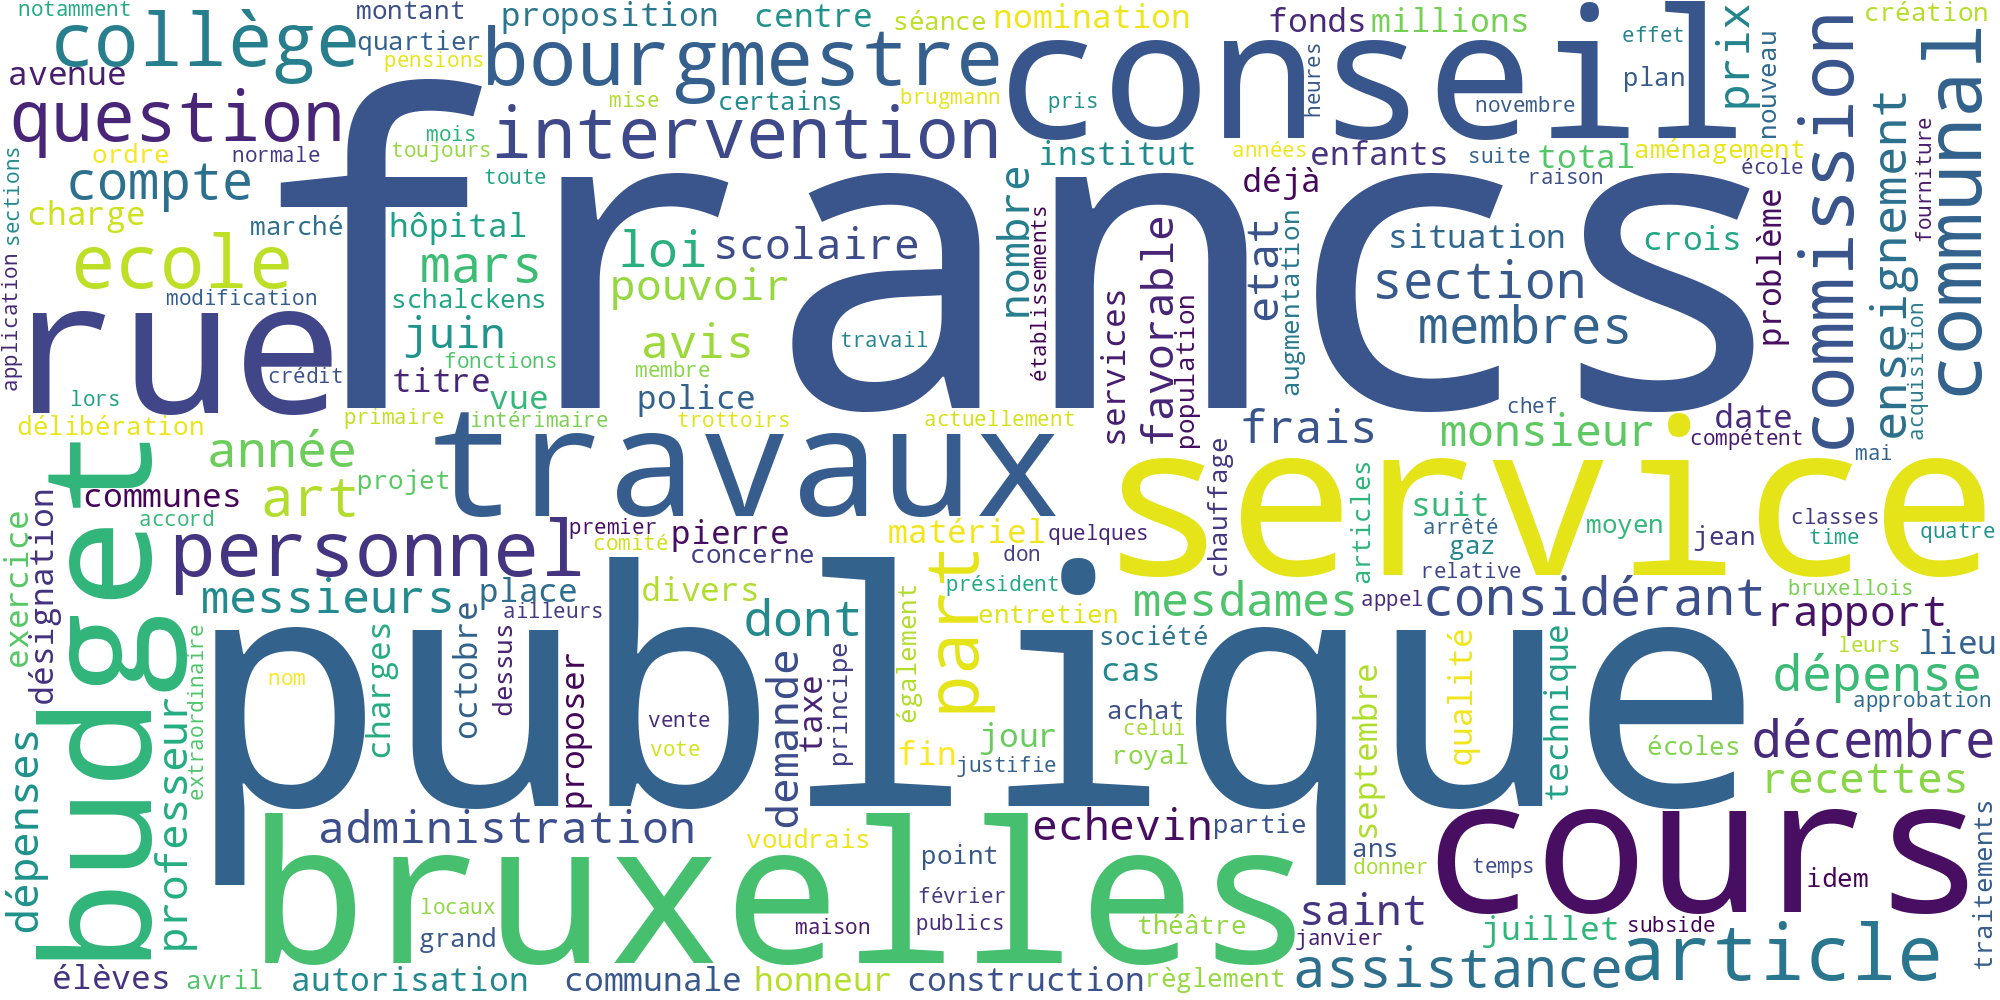

In [49]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Reconnaissance d'entités nommées avec SpaCy

### Imports

In [50]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [51]:
nlp = spacy.load('fr_core_news_md')

In [52]:
# Charger le texte
data_path = "../data/txt/"
n=1849
text = open("../data/all.txt", encoding='utf-8').read()[:n]

In [53]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: user 52.1 ms, sys: 15.9 ms, total: 68 ms
Wall time: 69.4 ms


In [54]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [55]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

## Sentiment analysis avec Textblob-FR

### Imports

In [56]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

### Fonction

In [57]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [58]:
get_sentiment("les multiples actes s'achèvent favorablement.")

This text is 20% positive and 0.1% subjective.


In [59]:
get_sentiment("Le Centre a ainsi pu collaborer à l'intéressante initiative de la Ville de Bruxelles dans la rénovation et l'ajustement de son enseignement technique et professionnel")

This text is 25% positive and 0.35% subjective.


In [60]:
get_sentiment("Les affections congénitales ont été rééduquées mais les traitements sont à poursuivre")

This text is neutral and perfectly objective.


In [61]:
get_sentiment("le Collège mérite des félicitations pour cela")

This text is neutral and perfectly objective.


In [62]:
get_sentiment("je reconnais volontiers que le problème de la circulation là-bas est extrêmement difficile")

This text is 50% negative and 0.4% subjective.


In [63]:
get_sentiment("Les dirigeants du Centre de Jeunesse sont très favorables à ce projet.")

This text is 48% positive and 0.45% subjective.


In [64]:
get_sentiment("Mais ces 8 millions n'ont pas été employés")

This text is neutral and perfectly objective.


In [65]:
get_sentiment("Il serait utile de lier à ces projets l'étude des agrandissements de la Cuisine Centrale et d'alerter en ce sens les services compétents")

This text is 12% positive and 0.05% subjective.


In [66]:
get_sentiment("Il ne faut pas confier cela à des mains quelconques")

This text is 15% negative and 0.1% subjective.


In [67]:
get_sentiment("est-ce bien vous qui donnez le mauvais exemple de fumer ?")

This text is 36% negative and 0.5% subjective.
